In [1005]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold


In [1006]:
# Lecture CSV
cars_data = pd.read_csv('../data/voiture.csv')

In [1007]:
print(len(cars_data))


11914


In [1008]:
cars_data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1009]:
# Data cleaning

cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

In [1010]:
cars_data.head()


,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [1011]:
print('Number of duplicates are : ', cars_data.duplicated().sum())
# exemple de doublon
print(cars_data[cars_data.duplicated(keep=False)].head(10))
# nombre de doublon 

print('Nb avant suppression de doublon : ', len(cars_data))
cars_data = cars_data.drop_duplicates()

print('Nb après suppression de doublon : ', len(cars_data))

Number of duplicates are :  715
      make     model  year                    fuel_type     hp  cylinders  \
11     BMW  1 Series  2013  premium unleaded (required)  230.0        6.0   
14     BMW  1 Series  2013  premium unleaded (required)  230.0        6.0   
17    Audi       100  1992             regular unleaded  172.0        6.0   
18    Audi       100  1992             regular unleaded  172.0        6.0   
20    Audi       100  1992             regular unleaded  172.0        6.0   
22    Audi       100  1993             regular unleaded  172.0        6.0   
24    Audi       100  1993             regular unleaded  172.0        6.0   
25    Audi       100  1993             regular unleaded  172.0        6.0   
87  Nissan     200SX  1996             regular unleaded  115.0        4.0   
88  Nissan     200SX  1996             regular unleaded  115.0        4.0   

   transmission              drive  doors              market     size  style  \
11       MANUAL   rear wheel drive    2

In [1012]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


In [1013]:
cars_data.drop('market', axis = 1, inplace = True)

cars_data.drop('popularity', axis = 1, inplace = True)



In [1014]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values


,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,price
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,20199


In [1015]:


cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(cars_data['hp'].mean())

cars_data['cylinders'] = cars_data['cylinders'].fillna(0.0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

In [1016]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

In [1017]:
# Supression des voitures ayant unknown

cars_data.drop(cars_data[cars_data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

print(len(cars_data))
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())


11187
Number of missing values in each columns are below : 
make            0
model           0
year            0
fuel_type       0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
price           0
dtype: int64


In [1018]:
s1 = cars_data.shape
clean = cars_data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1407


In [1019]:
# Nombre de ligne restante dans le dataset après nettoyage

print(len(cars_data))


9780


Partie IA KNN
Deviner le prix en fonction des caractéristiques


In [1020]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [1021]:
# Fonction d'encodage des variables catégoriques en fonction du prix moyen
def encode_categorical(df, col, target='price'):
    encoding = df.groupby(col)[target].mean() / df[target].mean()
    df[col] = df[col].map(encoding).fillna(0)
    return df, encoding

# Fonction de normalisation des variables numériques entre 0 et 1
def normalize_numerical(df, col):
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)
    return df, (min_val, max_val)

In [1022]:
# Fonction d'encodage et de normalisation dynamique
def encode_and_normalize(df, encoders, normalizers, categorical_cols, numerical_cols):
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].map(encoders[col]).fillna(0)

    for col in numerical_cols:
        if col in df.columns:
            min_val, max_val = normalizers[col]
            df[col] = (df[col] - min_val) / (max_val - min_val)

    return df

In [1023]:
# Variables
input_features = [
    'make', 'model', 'year', 'fuel_type', 'hp', 'cylinders',
    'transmission', 'drive', 'doors', 'size', 'style',
    'highway_mpg', 'city_mpg'
]

In [1024]:
# Fonction pour entraîner un modèle KNN en fonction des colonnes disponibles
def train_knn_model(cars_data, test_size=0.3, k_neighbors=4):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}

    for col in categorical_cols:
        if col in cars_data.columns:
            cars_data, encoder = encode_categorical(cars_data, col)
            encoders[col] = encoder

    for col in numerical_cols:
        if col in cars_data.columns:
            cars_data, normalizer = normalize_numerical(cars_data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in input_features if col in cars_data.columns]

    print(f"Available columns for training: {available_cols}")

    X = cars_data[available_cols]
    y = cars_data['price']

    # Define the number of splits for K-Fold Cross-Validation
    n_splits = 5  # You can adjust this value as needed
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold = 1
    r2_scores = []
    rmse_scores = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Entraîner le modèle
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X_train, y_train)

        # Évaluation
        y_test_pred = rf_model.predict(X_test)
        test_r2 = r2_score(y_test, y_test_pred)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        r2_scores.append(test_r2)
        rmse_scores.append(test_rmse)

        print(f"Fold {fold}: R² = {test_r2:.4f}, RMSE = {test_rmse:.2f}")
        fold += 1

    print("\n--- Résultats K-Fold ---")
    print(f"Moyenne R²: {np.mean(r2_scores):.4f}")
    print(f"Moyenne RMSE: {np.mean(rmse_scores):.2f}")
    print(f"Moyenne RMSE %: {(np.mean(rmse_scores) / y.mean()) * 100:.2f}%")

    return rf_model, encoders, normalizers, X_train

In [1025]:
def find_best_k(cars_data, input_features, max_k=30, test_size=0.3):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']


    # Copie du dataset pour éviter modification originale
    data = cars_data.copy()

    encoders = {}
    normalizers = {}

    for col in categorical_cols:
        if col in data.columns:
            data, encoder = encode_categorical(data, col)
            encoders[col] = encoder

    for col in numerical_cols:
        if col in data.columns:
            data, normalizer = normalize_numerical(data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in input_features if col in data.columns]
    X = data[available_cols]
    y = data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

    rmse_list = []

    for k in range(1, max_k + 1):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse)

    best_k = np.argmin(rmse_list) + 1

    # Affichage de la courbe
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_k + 1), rmse_list, marker='o')
    plt.title('Erreur RMSE en fonction du nombre de voisins (k)')
    plt.xlabel('k (nombre de voisins)')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.axvline(x=best_k, color='red', linestyle='--', label=f'Meilleur k = {best_k}')
    plt.legend()
    plt.show()

    print(f"✅ Meilleur k trouvé : {best_k} avec RMSE = {rmse_list[best_k - 1]:.2f}")

    return best_k

In [1026]:
# Charger et entraîner le modèle avec les données disponibles
#best_k = find_best_k(cars_data, input_features)
#knn_model, encoders, normalizers, X_train = train_knn_model(cars_data, k_neighbors=best_k)

In [1027]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

Partie IA RF
Deviner le prix en fonction des caractéristiques


In [1028]:
from sklearn.preprocessing import LabelEncoder

def train_rf_model(cars_data, test_size=0.3):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}

    # LabelEncoding for categorical columns
    for col in categorical_cols:
        if col in cars_data.columns:
            le = LabelEncoder()
            cars_data[col] = le.fit_transform(cars_data[col])
            encoders[col] = le

    # Normalization for numerical columns
    for col in numerical_cols:
        if col in cars_data.columns:
            cars_data, normalizer = normalize_numerical(cars_data, col)
            normalizers[col] = normalizer


    available_cols = [col for col in cars_data.columns if col != 'price']
    X = cars_data[available_cols]
    y = cars_data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_train_pred = rf_model.predict(X_train)

    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    print("\n--- Random Forest Training Results ---")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Train RMSE %: {(train_rmse / y_train.mean()) * 100:.2f}%")

    return rf_model, encoders, normalizers, X_train

In [1029]:
rf_model, rf_encoders, rf_normalizers, rf_X_train = train_rf_model(cars_data)

def preprocess_input_data(input_df, encoders, normalizers):
    # Encodage des colonnes catégoriques avec LabelEncoder
    for col, encoder in encoders.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].apply(
                lambda x: encoder.transform([x])[0] if x in encoder.classes_ else -1
            )

    # Normalisation des colonnes numériques
    for col, (min_val, max_val) in normalizers.items():
        if col in input_df.columns:
            input_df[col] = (input_df[col] - min_val) / (max_val - min_val)

    return input_df



# Fonction pour prédire le prix d'une voiture simulant une entrée utilisateur

def predict_price_rf(new_car, rf_model, encoders, normalizers, X_train):
    new_car_df = pd.DataFrame([new_car])

    # ✅ Prétraitement complet
    new_car_df = preprocess_input_data(new_car_df, encoders, normalizers)

    # affichage de la donnéess prétraitées
    print(new_car_df.head())

    # Réalignement des colonnes (en cas de colonne manquante)
    for col in X_train.columns:
        if col not in new_car_df.columns:
            new_car_df[col] = 0
    new_car_df = new_car_df[X_train.columns]

    # Prédiction
    predicted_price = rf_model.predict(new_car_df)
    print(f"Predicted price for the new car: ${predicted_price[0]:,.2f}")


# Exemple d'entrée utilisateur

input_data = {
    'make': 'Ford',
    'model': 'Mustang',
    'year': 2020,
    'fuel_type': 'premium unleaded (required)',
    'hp': 450,
    'cylinders': 8,
    'transmission': 'AUTOMATIC',
    'drive': 'rear wheel drive',
    'doors': 2,
    'size': 'Midsize',
    'style': 'Convertible',
    'highway_mpg': 28,
    'city_mpg': 16
}

# Autre exemple d'entrée utilisateur

input_data2 = { 
    'make': 'Kia',
    'model': 'Sportage',
    'year': 2017,
    'fuel_type': 'regular unleaded',
    'hp': 181,
    'cylinders': 4,
    'transmission': 'AUTOMATIC',
    'drive': 'front wheel drive',
    'doors': 4,
    'size': 'Midsize',
    'style': 'Convertible',
    'highway_mpg': 29,
    'city_mpg': 22
}

# Prédiction du prix

predicted_price = predict_price_rf(input_data, rf_model, rf_encoders, rf_normalizers, rf_X_train)

predicted_price2 = predict_price_rf(input_data2, rf_model, rf_encoders, rf_normalizers, rf_X_train)




--- Random Forest Training Results ---
Train R²: 0.9815
Train RMSE: 2114.67
Train RMSE %: 7.21%
   make  model      year  fuel_type        hp  cylinders  transmission  drive  \
0    10    454  1.111111          7  0.917062        1.0             1      3   

   doors  size  style  highway_mpg  city_mpg  
0    0.0     2      6     0.533333  0.285714  
Predicted price for the new car: $54,884.28
   make  model  year  fuel_type        hp  cylinders  transmission  drive  \
0    17    620   1.0          8  0.279621        0.2             1      2   

   doors  size  style  highway_mpg  city_mpg  
0    1.0     2      6     0.566667  0.571429  
Predicted price for the new car: $25,433.40


Partie IA SVM
Deviner le prix en fonction des caractéristiques



R2 Score : 0.7898302269754142
RMSE : 7182.462173668957


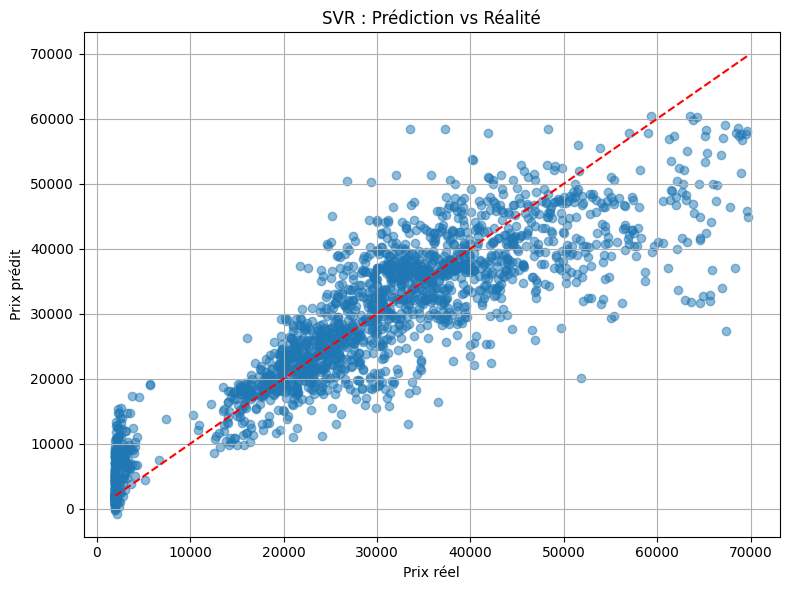

In [1030]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# Sélection des colonnes utiles
features = ['year', 'hp', 'cylinders', 'highway_mpg', 'city_mpg']
X = cars_data[features]
y = cars_data['price']

# Nettoyage : suppression des lignes avec valeurs manquantes
X = X.dropna()
y = y.loc[X.index]

# Split des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline avec standardisation + SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVR(kernel='rbf', C=1000, epsilon=100))
])

# Entraînement
svm_pipeline.fit(X_train, y_train)

# Prédictions
y_pred = svm_pipeline.predict(X_test)

# Évaluation
print("R2 Score :", r2_score(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ligne idéale
plt.xlabel("Prix réel")
plt.ylabel("Prix prédit")
plt.title("SVR : Prédiction vs Réalité")
plt.grid(True)
plt.tight_layout()
plt.show()


Nous avons testé une approche par SVM (Support Vector Machine) pour prédire le prix des véhicules à partir de caractéristiques techniques. Malgré son élégance théorique, la méthode s’est révélée nettement moins performante que les alternatives comme KNN ou Random Forest.

Avec un R² de seulement 0.79 et une erreur moyenne de plus de 7 000 $, le modèle SVM peine à capturer la complexité des relations non linéaires dans les données, même avec une transformation RBF (Radial Basis Function).

Trop fragile face à des données riches et variées
La SVM reste intéressante sur des problèmes bien cadrés, avec peu de variables ou des relations simples. Mais dans notre cas, avec des données riches, hétérogènes.